# Supervised Algorithms Homework

In this homework assignment, you will apply three fundamental machine learning algorithms to famous datasets:

1. **Linear Regression**: Boston Housing Price Prediction
2. **Logistic Regression**: Breast Cancer Classification
3. **Decision Tree**: Titanic Survival Prediction

### Instructions

- Implement **at least** one algorithm
- Complete each section carefully
- Add your code where indicated by `# YOUR CODE HERE`
- Provide comments explaining your approach

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Specific Algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Metrics and Datasets
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# 1: Linear Regression - Boston Housing Price Prediction

### Task
- Load the Boston Housing dataset
- Preprocess the data
- Split into training and testing sets
- Train a Linear Regression model
- Evaluate model performance

In [2]:
# Load Boston Housing dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)

# Extract features and target
X, y = boston.data, boston.target

In [3]:
# TODO: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Verifichiamo le dimensioni dei dati
len(X_train), len(X_test), len(y_train), len(y_test)

(404, 102, 404, 102)

**Spiegazione**:
Qui stiamo dividendo i dati in due parti: un set di training (80% dei dati) che useremo per addestrare il modello, e un set di test (20% dei dati) che useremo per valutare le prestazioni del modello. Il parametro random_state=42 assicura che la divisione sia riproducibile.

In [5]:
# TODO: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Spiegazione**: La standardizzazione è un'operazione che trasforma i dati in modo che abbiano media 0 e deviazione standard 1. Questo è importante perché molti algoritmi di machine learning funzionano meglio con dati standardizzati. Usiamo fit_transform sui dati di training per calcolare media e deviazione standard e poi applicare la trasformazione. Usiamo solo transform sui dati di test, applicando gli stessi parametri calcolati dai dati di training.

In [6]:
# TODO: Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Stampiamo i coefficienti del modello
print(f"Coefficienti: {lr_model.coef_[:5]}...")  # Mostriamo solo i primi 5 coefficienti
print(f"Intercetta: {lr_model.intercept_}")

Coefficienti: [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194 ]...
Intercetta: 22.796534653465343


**Spiegazione**: Qui stiamo creando un modello di regressione lineare e lo addestriamo sui dati di training standardizzati. Il metodo fit calcola i coefficienti ottimali per il modello. I coefficienti rappresentano l'importanza di ciascuna feature nel determinare il prezzo delle case. L'intercetta è il valore base da cui partiamo.

In [7]:
# TODO: Make predictions and calculate performance metrics

# Facciamo previsioni sui dati di test
y_pred = lr_model.predict(X_test_scaled)

# Calcoliamo le metriche di performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

In [8]:
# TODO: Print performance metrics

# Stampiamo le metriche
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 24.29
Root Mean Squared Error (RMSE): 4.93
R² Score: 0.67


**Spiegazione**: Ora usiamo il modello addestrato per fare previsioni sui dati di test e calcoliamo diverse metriche per valutare le prestazioni:

1. **Mean Squared Error (MSE): 24.29**  
   - Il MSE rappresenta l'errore quadratico medio, ovvero la somma delle differenze quadrate tra i valori reali e quelli predetti, divisa per il numero di campioni. Un MSE di **24.29** indica che il modello ha ancora un margine di errore, e ci sono discrepanze significative in alcuni punti predetti.

2. **Root Mean Squared Error (RMSE): 4.93**  
   - L'RMSE è la radice quadrata del MSE e offre una metrica più interpretabile. In questo caso, il valore medio delle deviazioni degli errori è di circa **4.93 unità**, rendendo chiaro l'entità media dell'errore per ogni punto. Valori più bassi indicherebbero una maggiore precisione.

3. **R² Score: 0.67**  
   - Questo è il coefficiente di determinazione, che misura quanto bene il modello spiega la variabilità nei dati reali. Un valore di **0.67** implica che il modello spiega il **67% della varianza** dei dati. Sebbene non sia un risultato eccellente, indica una discreta capacità del modello di catturare la relazione tra le variabili.

---



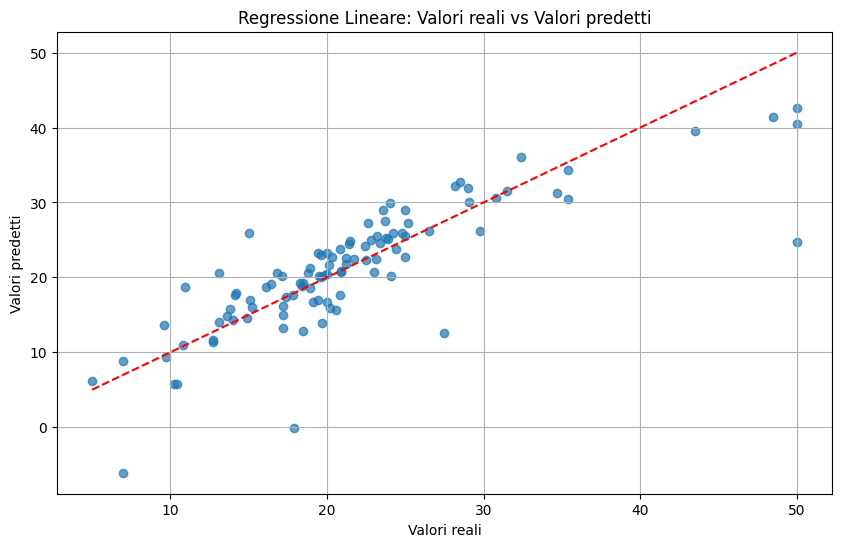

In [9]:
# Visualizziamo i risultati
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valori reali')
plt.ylabel('Valori predetti')
plt.title('Regressione Lineare: Valori reali vs Valori predetti')
plt.grid(True)
plt.show()

**Spiegazione**: Questo grafico mostra i valori reali contro quelli predetti. La linea rossa tratteggiata rappresenta la predizione perfetta. Più i punti sono vicini a questa linea, migliore è il modello.

### **Analisi del Grafico**

Il grafico rappresenta una comparazione visiva tra i valori reali e quelli predetti, con punti dati (blu) e una linea di regressione (rossa tratteggiata).  
- **Allineamento generale:** La maggior parte dei punti si avvicina alla linea rossa, indicando che le predizioni del modello sono generalmente coerenti con i valori reali.  
- **Deviazioni evidenti:** Ci sono però alcuni punti che si discostano dalla linea, contribuendo all'errore (MSE e RMSE). Questo suggerisce che il modello non riesce a catturare perfettamente tutte le complessità nei dati.

---

### **Considerazioni Generali**
1. **Punti di forza:**  
   - Il modello è relativamente efficace (R² = 0.67), suggerendo che ci sono pattern significativi nei dati che il modello riesce a catturare.  
   - Il RMSE è gestibile, ma potrebbe migliorare con ulteriori ottimizzazioni.

2. **Possibili miglioramenti:**  
   - **Feature Engineering:** Aggiungere o trasformare alcune variabili potrebbe aiutare a migliorare le prestazioni.  
   - **Modello più complesso:**  considerare l'uso di modelli non lineari (come Random Forest o Gradient Boosting) se si sospettano relazioni più complesse nei dati.  

--- 

# Part 2: Logistic Regression - Breast Cancer Classification

### Task
- Load the Breast Cancer dataset
- Preprocess the data
- Split into training and testing sets
- Train a Logistic Regression model
- Evaluate model performance

In [10]:
breast_cancer = load_breast_cancer()
X_cancer = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y_cancer = breast_cancer.target

In [11]:
# TODO: Split the data into training and testing sets

# Dividiamo i dati in set di training (80%) e testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

# Verifichiamo le dimensioni dei dati
len(X_train), len(y_train), len(X_test), len(y_test)

(455, 455, 114, 114)

In [12]:
# TODO: Scale the features

# Standardizziamo le features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verifichiamo che i dati siano stati standardizzati
print(f"Media di X_train_scaled: {np.mean(X_train_scaled, axis=0)[:3]}...")
print(f"Deviazione standard di X_train_scaled: {np.std(X_train_scaled, axis=0)[:3]}...")

Media di X_train_scaled: [-1.82418183e-15 -3.36348775e-15 -3.60078268e-15]...
Deviazione standard di X_train_scaled: [1. 1. 1.]...


In [13]:
# TODO: Train a Logistic Regression model
# Creiamo e addestriamo il modello di regressione logistica
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

# Stampiamo i coefficienti del modello
print(f"Coefficienti: {log_model.coef_[0][:5]}...")  # Mostriamo solo i primi 5 coefficienti
print(f"Intercetta: {log_model.intercept_}")

Coefficienti: [-0.43190368 -0.38732553 -0.39343248 -0.46521006 -0.07166728]...
Intercetta: [0.44558453]


In [14]:
# TODO: Make predictions and calculate performance metrics

# Facciamo previsioni sui dati di test
y_pred = log_model.predict(X_test_scaled)

# Calcoliamo le metriche di performance
accuracy = accuracy_score(y_test, y_pred)


In [15]:
# TODO: Print performance metrics

print(f"Accuratezza: {accuracy:.2f}")

# Stampiamo il report di classificazione
print("\nReport di classificazione:")
print(classification_report(y_test, y_pred, target_names=['Maligno', 'Benigno']))

Accuratezza: 0.97

Report di classificazione:
              precision    recall  f1-score   support

     Maligno       0.98      0.95      0.96        43
     Benigno       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114





### **Analisi delle Metriche**

1. **Precision**: Rappresenta la percentuale di predizioni corrette tra quelle fatte per una determinata classe.  
   - **Maligno: 0.98** → Il 98% delle predizioni per la classe "Maligno" sono corrette.  
   - **Benigno: 0.97** → Anche in questo caso, il modello è altamente accurato, con il 97% di precisione.


2. **Recall**: Indica quanto il modello identifica correttamente le osservazioni di una classe.  
   - **Maligno: 0.95** → Il modello identifica il 95% dei casi realmente maligni. Ci sono poche osservazioni maligne che non sono state individuate.  
   - **Benigno: 0.99** → La classe "Benigno" è riconosciuta quasi perfettamente, con il 99% dei casi effettivamente corretti.


3. **F1-Score**: È una media armonica di precision e recall, utile quando è importante bilanciare entrambe.  
   - **Maligno: 0.96** → Buon equilibrio tra precision e recall per questa classe.  
   - **Benigno: 0.98** → Leggermente migliore della classe "Maligno", dato il recall elevato.


4. **Macro Avg e Weighted Avg**:  
   - **Macro Avg: 0.97** → Media semplice delle metriche tra le classi. Mostra che entrambe le classi sono ben bilanciate.  
   - **Weighted Avg: 0.97** → Media ponderata delle metriche, tenendo conto del numero di osservazioni per ogni classe. Qui domina la classe "Benigno", che ha più campioni (71 contro 43).

---

### **Punti di Interesse**

1. **Distribuzione delle Classi**:  
   - La classe "Benigno" ha un numero significativamente maggiore di campioni (71) rispetto alla classe "Maligno" (43). Questo potrebbe aver influenzato leggermente il modello, ma le prestazioni per entrambe le classi sono ottime.


2. **Sbilanciamento Limitato**:  
   - Sebbene le due classi abbiano un diverso supporto (numero di campioni), il modello è riuscito a gestirlo bene senza segnali di compromissione per la classe minoritaria (Maligno).


3. **Elevata Accuratezza**:  
   - Con un'accuratezza complessiva del 97%, il modello offre predizioni estremamente affidabili e può essere utilizzato con sicurezza per il problema classificatorio.


4. **Possibili Miglioramenti**:  
   - Il recall per la classe "Maligno" (0.95) potrebbe essere migliorato se l'applicazione richiede una maggiore sensibilità (ad esempio, per non trascurare casi maligni in un contesto medico). Questo potrebbe essere fatto regolando la soglia decisionale.



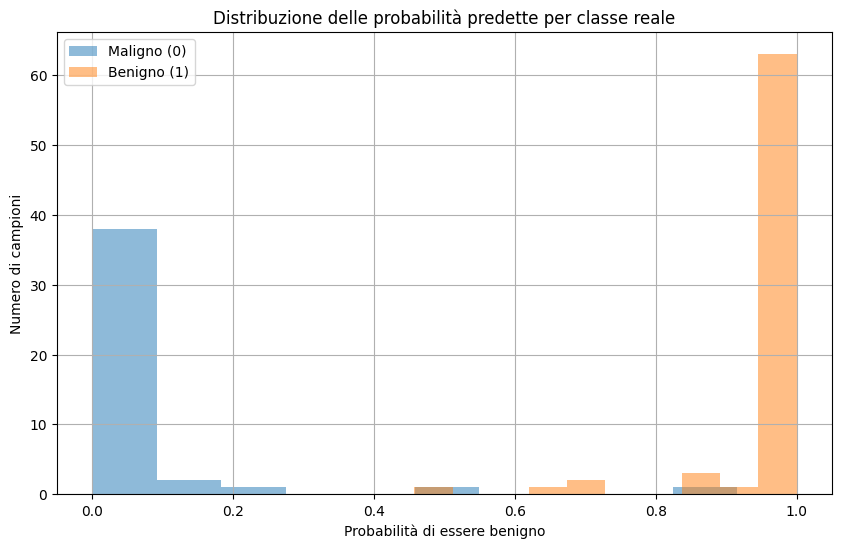

In [16]:
# Calcoliamo le probabilità di appartenenza alla classe positiva
y_prob = log_model.predict_proba(X_test_scaled)[:, 1]

# Visualizziamo la distribuzione delle probabilità per ciascuna classe reale
plt.figure(figsize=(10, 6))
plt.hist(y_prob[y_test == 0], alpha=0.5, label='Maligno (0)')
plt.hist(y_prob[y_test == 1], alpha=0.5, label='Benigno (1)')
plt.xlabel('Probabilità di essere benigno')
plt.ylabel('Numero di campioni')
plt.legend()
plt.title('Distribuzione delle probabilità predette per classe reale')
plt.grid(True)
plt.show()




Il grafico rappresenta la **Distribuzione delle Probabilità Predette** da un modello di classificazione binaria per la classificazione tra **Maligno (0)** e **Benigno (1)**. Ecco un'analisi dettagliata:

---

### **Struttura del Grafico**
1. **Asse X:**  
   - Indica la **probabilità predetta dal modello per la classe Benigno (1)**, con valori che variano da **0 a 1**.  
   - Probabilità basse (vicine a 0) rappresentano campioni classificati come Maligno, mentre probabilità alte (vicine a 1) rappresentano campioni Benigni.

2. **Asse Y:**  
   - Mostra il **numero di campioni** per ciascun intervallo di probabilità. Questo serve a valutare la distribuzione delle probabilità per le due classi reali.

3. **Colore delle Barre:**  
   - **Blu:** Campioni reali Maligni (0).  
   - **Arancione:** Campioni reali Benigni (1).

---

### **Interpretazione dei Risultati**
- **Campioni Benigni (1):**  
   - La maggior parte dei campioni Benigni ha probabilità molto alte (vicine a 1), il che indica che il modello è molto accurato nel classificarli correttamente.  
   - Le barre arancioni sono concentrate verso l'estrema destra, segnalando che i campioni Benigni hanno una chiara separazione.

- **Campioni Maligni (0):**  
   - Le barre blu si trovano prevalentemente verso l'estrema sinistra (probabilità vicine a 0), il che suggerisce che il modello è efficace nell'identificare i campioni Maligni.  
   - Tuttavia, alcune sovrapposizioni potrebbero suggerire che una piccola parte dei campioni è classificata in modo meno chiaro.

- **Separabilità delle Classi:**  
   - Il grafico suggerisce che il modello ha una buona capacità di separazione tra le due classi, con distribuzioni nette tra probabilità basse (Maligno) e alte (Benigno).  
   - La sovrapposizione minima tra blu e arancione indica poche ambiguità nei risultati.

---

### **Punti di Forza**
1. **Modello Efficace:**  
   - Le probabilità ben distribuite dimostrano che il modello è ben calibrato e riesce a distinguere chiaramente le due classi.  
2. **Prestazioni Solide:**  
   - Il modello è particolarmente preciso nella previsione di entrambe le classi, come evidenziato dalla forte separazione tra le distribuzioni.

---



## Part 3: Decision Tree - Titanic Survival Prediction

### Task
- Load the Titanic dataset
- Preprocess the data (handling missing values, encoding categorical variables)
- Split into training and testing sets
- Train a Decision Tree Classifier
- Evaluate model performance

In [25]:
# Load Titanic dataset
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

In [26]:
# Data Preprocessing
# TODO: Handle missing values

# Esploriamo i dati
print(titanic.info())
print("\nValori mancanti per colonna:")
print(titanic.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
None

Valori mancanti per colonna:
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [27]:
# Feature selection
features = ['Pclass', 'Sex', 'Age', 'Fare']
X_titanic = titanic[features]
y_titanic = titanic['Survived']

# colonne numeriche da scalare
numeric_features = ['Age', 'Fare']
#  colonne categoriche
categorical_features = ['Pclass', 'Sex']


In [28]:
# TODO: Scale the features

# Standardizza le caratteristiche numeriche
scaler = StandardScaler()
X_titanic[numeric_features] = scaler.fit_transform(X_titanic[numeric_features])


Lo scaling trasforma i dati numerici (età e tariffa) in una scala standard (media 0, deviazione standard 1), migliorando l'efficienza del modello

In [29]:
# TODO: Encode the features

# Applica l'encoding per variabili categoriche
X_titanic = pd.get_dummies(X_titanic, columns=categorical_features, drop_first=True)


In [31]:
# Visualizziamo le nuove feature
print("\nFeature dopo la codifica:")
print(X_titanic.columns.tolist())


Feature dopo la codifica:
['Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male']


**Spiegazione**: Selezioniamo le feature che potrebbero essere rilevanti per la predizione della sopravvivenza. Poi, codifichiamo la variabile categoriche ('Sex') usando one-hot encoding con pd.get_dummies(). 
Questa funzione trasforma la variabile categorica "Sex" in variabili dummy (o variabili binarie).
Se la colonna "Sex" conteneva i valori "male" e "female", il metodo get_dummies la trasforma in due colonne: 'Sex_female' e 'Sex_male', con valori 0 o 1.

L'opzione drop_first=True elimina una delle colonne dummy per evitare la multicollinearità, in sostanza elimina la prima categoria ("Sex_female" o "Sex_male") per evitare la trappola delle variabili fittizie (dummy variable trap).
Se non lo facessimo, avremmo due colonne fortemente correlate (se Sex_male = 1, allora Sex_female = 0, e viceversa), causando problemi nei modelli di regressione.
Così, resta solo una colonna: 'Sex_male' (se vale 1, il passeggero è maschio; se vale 0, è femmina).

In [32]:
# TODO: Split the data into training and testing sets

X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(
    X_titanic, y_titanic, test_size=0.2, random_state=42)

In [36]:
# TODO: Train a Decision Tree Classifier

tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train_titanic, y_train_titanic)



DecisionTreeClassifier(max_depth=3, random_state=42)

**Spiegazione**: Creiamo un albero decisionale con profondità massima 5 e lo addestriamo sui dati di training. 

In [37]:
# TODO: Make predictions and calculate performance metrics

# Previsioni sul test set
y_pred_titanic = tree_model.predict(X_test_titanic)

accuracy_titanic = accuracy_score(y_test_titanic, y_pred_titanic)


Accuratezza del modello Decision Tree: 0.78
Report di classificazione:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       111
           1       0.75      0.60      0.67        67

    accuracy                           0.78       178
   macro avg       0.77      0.74      0.75       178
weighted avg       0.77      0.78      0.77       178



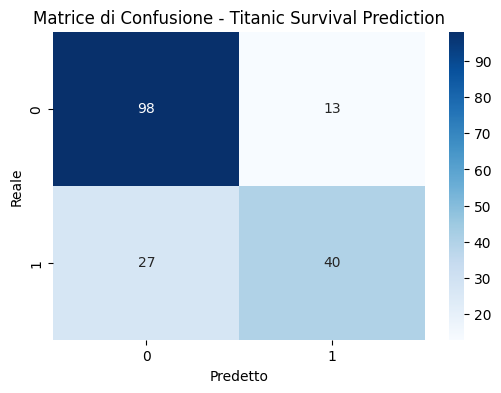

In [38]:
# TODO: Print performance metrics

print(f'Accuratezza del modello Decision Tree: {accuracy_titanic:.2f}')

# Report di classificazione
print("Report di classificazione:")
print(classification_report(y_test_titanic, y_pred_titanic))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_titanic, y_pred_titanic), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di Confusione - Titanic Survival Prediction")
plt.show()

### Analisi dei Risultati del Modello Decision Tree - Titanic Survival Prediction 🚢

---

#### **1. Accuratezza del Modello**
- **Accuratezza complessiva:**  
  L'accuratezza del modello è **0.78 (78%)**, il che significa che il modello predice correttamente la sopravvivenza del 78% dei passeggeri. È un risultato accettabile, ma c'è margine per migliorare ulteriormente.

---

#### **2. Report di Classificazione**

| Classe         | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| **Non Sopravvissuti (0)** | 0.78      | 0.88   | 0.83     | 111     |
| **Sopravvissuti (1)**      | 0.75      | 0.60   | 0.67     | 67      |

- **Precision:**  
  - Classe **0 (Non Sopravvissuti):** Il modello è molto preciso, con una precisione del 78%, il che significa che la maggior parte dei casi predetti come "Non Sopravvissuti" sono corretti.
  - Classe **1 (Sopravvissuti):** La precisione è leggermente più bassa (75%), ma comunque accettabile.

- **Recall:**  
  - Per la classe **0 (Non Sopravvissuti)**, il modello identifica correttamente l'88% dei casi effettivi.
  - Tuttavia, per la classe **1 (Sopravvissuti)**, il recall scende al **60%**, indicando che molti casi di sopravvivenza non vengono identificati.

- **F1-Score:**  
  - Combina precision e recall. La classe **0** ottiene un F1-score di **0.83**, mentre la classe **1** ha un punteggio più basso (0.67), suggerendo un equilibrio meno buono per questa classe.

---

#### **3. Matrice di Confusione**

| Reale ↓ / Predetto → | **Non Sopravvissuti (0)** | **Sopravvissuti (1)** |
|-----------------------|---------------------------|------------------------|
| **Non Sopravvissuti (0)** | 98                       | 13                     |
| **Sopravvissuti (1)**      | 27                       | 40                     |

- **Vero Negativi (TN):** **98** casi sono correttamente classificati come "Non Sopravvissuti".  
- **Falsi Positivi (FP):** **13** casi non sopravvissuti sono erroneamente classificati come "Sopravvissuti".  
- **Falsi Negativi (FN):** **27** casi di sopravvivenza vengono erroneamente classificati come "Non Sopravvissuti".  
- **Vero Positivi (TP):** **40** casi di sopravvivenza sono correttamente identificati.

**Osservazione:** Il modello è più efficace nel riconoscere i "Non Sopravvissuti" (TN e FP) rispetto ai "Sopravvissuti" (TP e FN). Migliorare il recall della classe 1 (Sopravvissuti) potrebbe essere una priorità.

---

#### **4. Punti di Forza**
- Buona precision per entrambe le classi.
- Il modello cattura correttamente la maggior parte dei casi non sopravvissuti, il che può essere utile in scenari in cui i falsi positivi hanno meno peso.

---


### **Conclusione**
Il modello è accurato nel classificare i non sopravvissuti, ma fatica a identificare tutti i sopravvissuti. Con alcune ottimizzazioni, potrebbe migliorare significativamente nel recall della classe 1, rendendolo più efficace per applicazioni reali. 

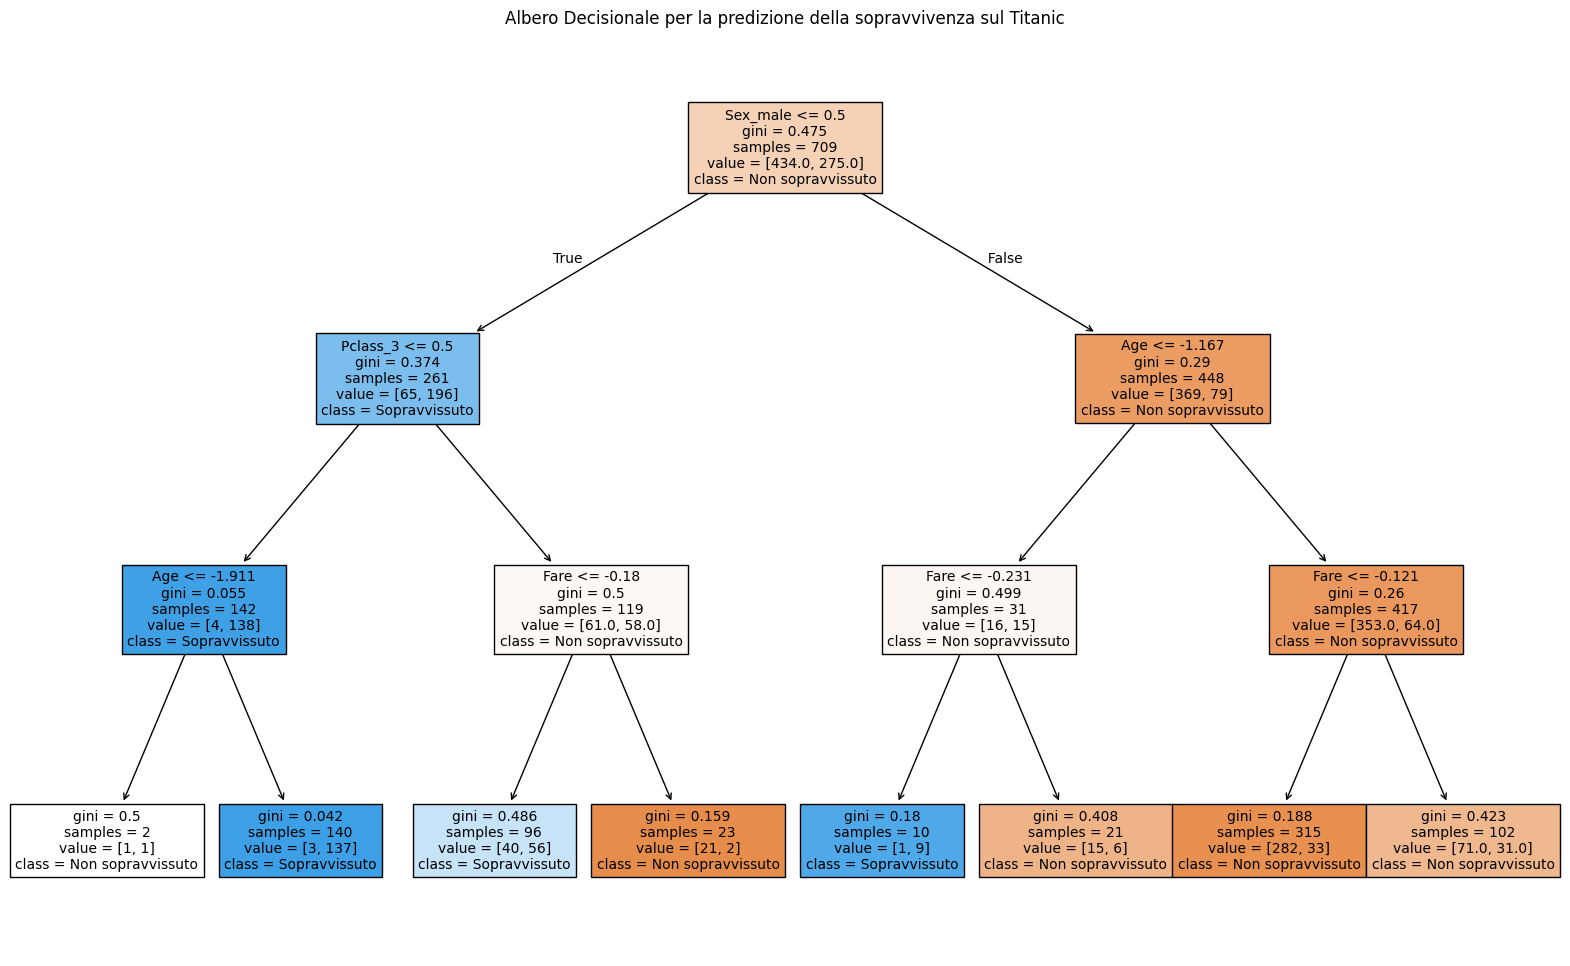

In [40]:
# TODO: Visualize Decisoion Tree

# Visualizziamo l'albero decisionale
plt.figure(figsize=(20, 12))
plot_tree(tree_model, feature_names=X_train_titanic.columns, class_names=['Non sopravvissuto', 'Sopravvissuto'], filled=True)
plt.title('Albero Decisionale per la predizione della sopravvivenza sul Titanic')
plt.show()

**Spiegazione**: Visualizziamo l'albero decisionale per comprendere meglio come il modello prende le decisioni. Ogni nodo mostra la feature utilizzata per la divisione, il valore di cutoff, il numero di campioni e la distribuzione delle classi.

### **Analisi del Decision Tree - Predizione della Sopravvivenza sul Titanic 🚢**

#### **1. Radice dell'Albero (Root Node)**
- **Split iniziale:** `Sex_male <= 0.5`  
   - Questo nodo divide i passeggeri in base al sesso:
     - **True:** Donne (sex = female), che vengono inviate al ramo di sinistra.
     - **False:** Uomini (sex = male), che vengono inviate al ramo di destra.
   - **Motivazione dello split:** Il sesso è una delle caratteristiche più importanti per predire la sopravvivenza. Le donne avevano maggiori probabilità di sopravvivere a causa delle priorità di salvataggio dell'epoca ("donne e bambini prima").

---

#### **2. Ramo Sinistro (Donne - `True`)**
- **Secondo split:** `Pclass_3 <= 0.5`  
   - Divide ulteriormente le donne in base alla classe della cabina:
     - **True:** Donne delle prime due classi (prima e seconda classe).
     - **False:** Donne della terza classe.
   - **Osservazione:** Le donne delle prime due classi hanno una probabilità di sopravvivenza più alta rispetto a quelle della terza classe. Questo riflette il ruolo della classe socioeconomica nell'accesso ai mezzi di salvataggio.

- **Ulteriori nodi per la terza classe:**  
   - Si introducono nodi basati su età (`Age <= -1.911`, normalizzata) e costo del biglietto (`Fare <= -0.18`), evidenziando che, anche all'interno della terza classe, fattori come l'età e il biglietto influivano sulla sopravvivenza.

---

#### **3. Ramo Destro (Uomini - `False`)**
- **Secondo split:** `Age <= -1.167`  
   - Questo nodo separa gli uomini in base all'età, dove i bambini (età bassa) hanno una probabilità di sopravvivenza maggiore rispetto agli adulti.

- **Ulteriori nodi:**  
   - Come per le donne, il prezzo del biglietto (`Fare <= -0.231`) e altri fattori influenzano la decisione.
   - La maggior parte degli uomini è classificata come **Non Sopravvissuto**, coerentemente con i tassi storici di mortalità degli uomini rispetto alle donne.

---

#### **4. Gini Impurity**
- **Significato:**  
   - La metrica di Gini indica il livello di "impurità" (confusione) in ogni nodo.
     - Valore di **0:** Il nodo è "puro," cioè appartiene completamente a una singola classe.
     - Valore vicino a **0.5:** Alta impurità, il nodo contiene un mix bilanciato di entrambe le classi.
   - Ad esempio:
     - Nodi con maggioranza femminile nelle prime classi mostrano Gini bassi, poiché la sopravvivenza è altamente probabile.
     - Nodi maschili o di classe inferiore tendono a mostrare impurità più elevate.

---

#### **5. Interpretazione Pratica**
- **Regole decisive:**  
   - I nodi principali rivelano quanto siano influenti il **sesso**, la **classe della cabina** e l'**età** nella predizione della sopravvivenza.
- **Decisioni intuitive:**  
   - L'albero decisionale conferma le dinamiche storiche del Titanic (ad esempio, le priorità di evacuazione, "donne e bambini prima"), fornendo un modello semplice e interpretabile per la classificazione.

---

### **Punti di Forza**
- **Facilità di interpretazione:**  
   L'albero decisionale permette di comprendere facilmente le regole di predizione.
- **Importanza delle feature:**  
   I fattori chiave del modello (sesso, classe, età, costo del biglietto) confermano quanto osservato nelle analisi storiche.

---

### **Possibili Miglioramenti**
1. **Ottimizzazione dei parametri:**  
   - Ridurre la profondità dell'albero per evitare **overfitting**, mantenendo le regole principali.
2. **Aggiunta di nuove feature:**  
   - Incorporare altre variabili (es. porto di imbarco) per migliorare la predizione.
3. **Validazione incrociata:**  
   - Testare il modello con set di dati diversi per valutarne la generalizzabilità.

---

### **Conclusione**
Questo albero decisionale fornisce una rappresentazione chiara e storicamente accurata della sopravvivenza sul Titanic, rendendolo non solo utile per la predizione ma anche per comprendere i fattori chiave che hanno influenzato i risultati reali. 